In [1]:
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets

# Parameters

In [2]:
dataset='ElectricDevices'

In [3]:
train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)

In [4]:
print(train_x.shape)
print(test_x.shape)

(8926, 96, 1)
(7711, 96, 1)


In [5]:
train_x.shape

(8926, 96, 1)

In [6]:
train_y.shape

(8926,)

# Load Model

In [7]:

import tensorflow as tf 
model_to_explain = tf.keras.models.load_model(f'../../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

2023-06-15 11:04:50.284047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 11:04:50.505469: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-15 11:04:50.505494: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-15 11:04:51.418759: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Explanation Algo

In [8]:
explained_instance = train_x[0]
nb_interpretable_feature = 10
explanation_size = 5
nb_neighbors = 1000
learning_process_name = 'Lime'
transform_name = 'straight_line'

In [9]:
from TSInterpret.InterpretabilityModels.leftist.leftist import LEFTIST


In [10]:

leftist = LEFTIST(model_to_explain,(test_x, test_y),mode='time',backend='TF',transform_name='straight_line',learning_process_name='Lime')
#,'straight_line',segmentator,,learning_process_name

In [11]:
explanations = leftist.explain(np.array(explained_instance))

32/32 [==============================] - 0s 5ms/step


time mode
(1, 96)
(1, 96)
-1
1
0


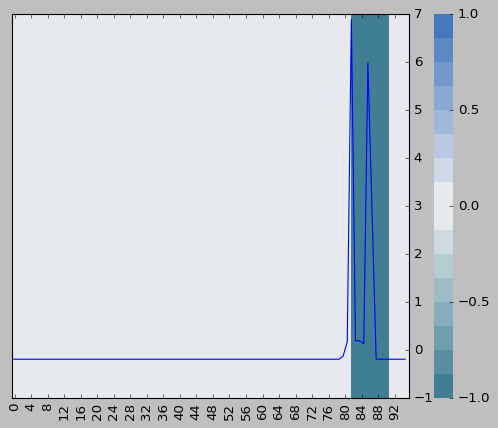

In [13]:
leftist.plot(np.array([explained_instance]), np.array([explanations[1]]))